<a href="https://colab.research.google.com/github/Bimpe2/code/blob/main/Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Movie Ratings Dataset into a Pandas

1. Saving the dataset as movie ratings
2. confirming that the dataset was properly imported by using the function head


In [ ]:
import pandas as pd
import numpy as np

movie_ratings = pd.read_csv('/content/drive/MyDrive/WIT_Colab_Notebooks/P4-Movie-Ratings.csv')
movie_ratings.head()
#to confirm that the data was properly imported

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


##Step 2: Data Exploration

> Indented block



### Understand the columns in the dataset:

1. Film - this column contains the name or title of the movie. There are no duplicates in the dataset. In total we have 559 Film.
2. Genre - this column contains the genre of the movie. There are 7 different Genre in our dataset
3. Rotten Tomatoes Ratings % - The column contains ratings made by movie critics for the movie
4. Audience Ratings % - The column contains ratings made by the audience for the movie
5. Budget (million $) - The column contains the budget in millions that went into the production of the movie
6. Year of release - This column contains the year that the movie was released

In [ ]:
movie_ratings.columns


Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [ ]:
print(movie_ratings["Film"],
movie_ratings["Genre"],
movie_ratings["Rotten Tomatoes Ratings %"],
movie_ratings["Audience Ratings %"],
movie_ratings["Budget (million $)"],
movie_ratings["Year of release"])

### What is the datatype of each column?
The Film and Genre column contain categorical data while the Rotten Tomatoes Ratings %,	Audience Ratings %,	Budget (million $) & Year of release all contain numerical data.

#### What is the target variable? And why?

The target variable that I would be utilizing is the Genre column. I am curious to explore the differences between the the various Genre.
I would like to find out what GENRE is more profitable and what GENRE is more profitable and what genre was more popular in different period. Most of my analysis would be centred on GENRE which is why I am choosing it as my target variable

In [ ]:
#data type of each coloumn
movie_ratings.dtypes

Film                         object
Genre                        object
Rotten Tomatoes Ratings %     int64
Audience Ratings %            int64
Budget (million $)            int64
Year of release               int64
dtype: object

In [ ]:
#how to analyze the categorical data type(Genre & films)
#count of unique genre
count_genre = movie_ratings['Genre'].nunique()
print("The total unique Genre is :", count_genre)

#count of unique film
count_films = movie_ratings['Film'].nunique()
print("The total unique Film is :" ,count_films)

#List of the unique genre
genre_list = movie_ratings['Genre'].unique()
print('The list of unique genre includes \n' , genre_list)

#movie_ratings['Genre'].unique()


The total unique Genre is : 7
The total unique Film is : 559
The list of unique genre includes 
 ['Comedy' 'Adventure' 'Action' 'Horror' 'Drama' 'Romance' 'Thriller']


### Describe the shape of the dataset:
 The dataset has 559 rows and 6 columns

In [ ]:
# to find out the shape of the dataset --> 559 rows and 6 coloumns
movie_ratings.shape

(559, 6)

The dataset has no null values

In [ ]:
#checking for null values in the dataset
movie_ratings["Genre"].isnull().values.any()
movie_ratings.isnull().sum()


In [ ]:
#checking for any duplicated rows
duplicate_rows = movie_ratings.duplicated()
print(duplicate_rows)
movie_ratings[duplicate_rows]

0      False
1      False
2      False
3      False
4      False
       ...  
554    False
555    False
556    False
557    False
558    False
Length: 559, dtype: bool


,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release


In [ ]:
#looking for any duplicated rows
duplicate_rows = movie_ratings.duplicated()
print(duplicate_rows)
movie_ratings[duplicate_rows]

0      False
1      False
2      False
3      False
4      False
       ...  
554    False
555    False
556    False
557    False
558    False
Length: 559, dtype: bool


,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release


### Basic Statistics for numerical columns
1. The mean for the Rotten tomatoes and Audience ratings differ by 11, with the higher audience rating.
2. The minimum value for Rotten tomatoes ratings, Audience ratings and Budget are zero. This looks very weird because except a movie is really bad their rating should at least be a number above zero. Also, it is also really weird that there was no budget for a movie. *The zero values need to be explored more*
3. The max budget is arounf 300 million but the 75% percentile amount for budget is 65 million. This might mean that the max amount is an anomaly, but more visualization and data exploration would be needed to conclude.
4. The year of release for our data is from Year 2007 to 20111.

In [ ]:
#Describe the meaning of each numerical column
movie_ratings.describe()

,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [ ]:
'''integer_columns = ['Rotten Tomatoes Ratings %',	'Audience Ratings %',	'Budget (million $)']
movie_integer_subset = movie_ratings[integer_columns]
movie_integer_subset.head()
print('The mean for the integer column are:' , movie_integer_subset.mean())
print('The median for the integer column are:' ,  movie_integer_subset.median())
print('The standard deviation for the integer column are:' , movie_integer_subset.std())'''

"integer_columns = ['Rotten Tomatoes Ratings %',\t'Audience Ratings %',\t'Budget (million $)']\nmovie_integer_subset = movie_ratings[integer_columns]\nmovie_integer_subset.head()\nprint('The mean for the integer column are:' , movie_integer_subset.mean())\nprint('The median for the integer column are:' ,  movie_integer_subset.median())\nprint('The standard deviation for the integer column are:' , movie_integer_subset.std())"

### Examine Variable Relationships
1. What is the average budget of genre by years
2. Do some genres get better ratings than others
3. Is there a correlation between the rotten tomatoe ratings and the audience ratings
4. is there a relationship between the various genre and the rotten tomatoe rating between different time period  

In [ ]:
import seaborn as sns

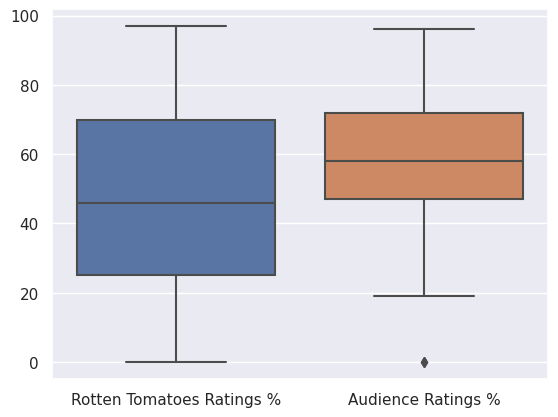

In [ ]:
sub_ratings = movie_ratings[['Genre','Rotten Tomatoes Ratings %',	'Audience Ratings %']]
sub_ratings
sns.boxplot(sub_ratings)
sns.set(font_scale=2.0)

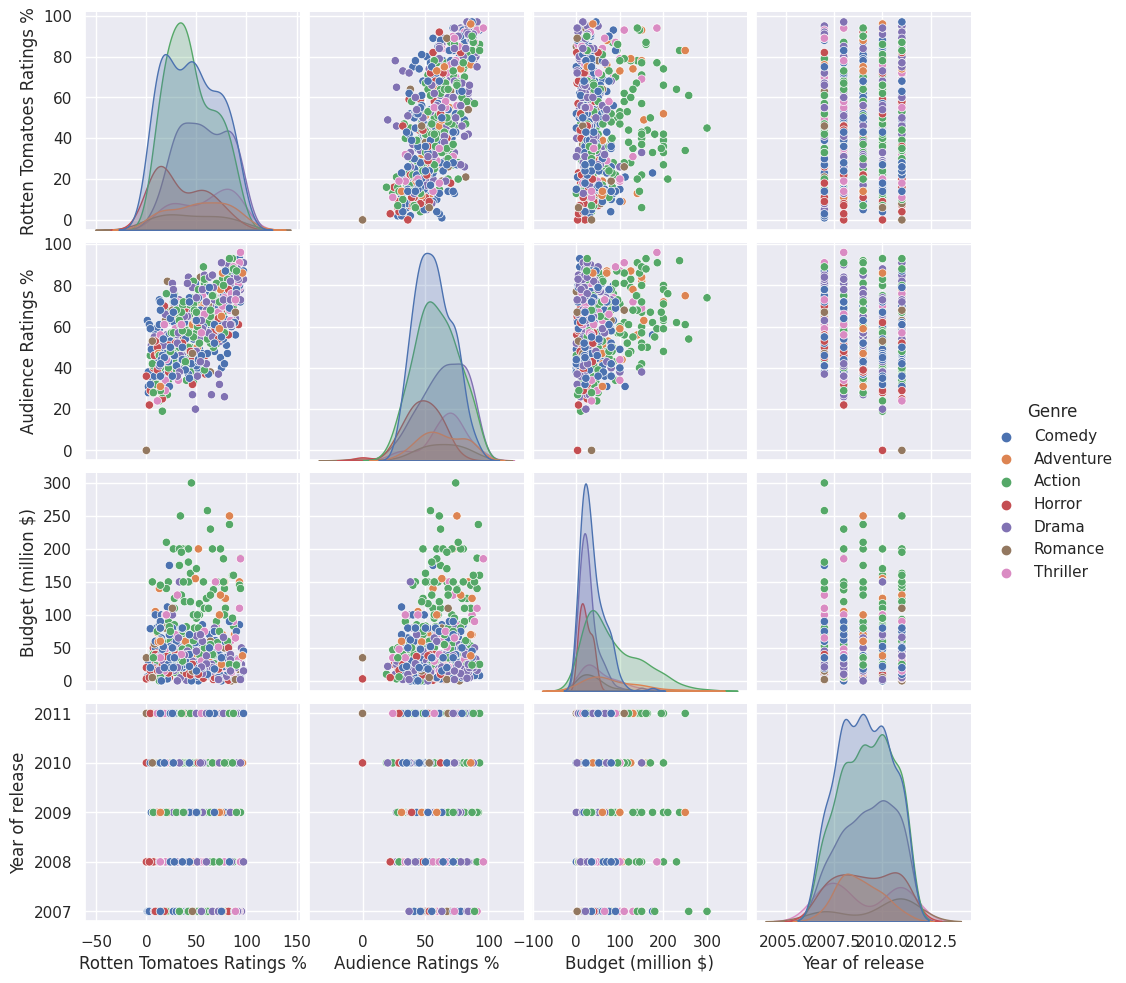

In [ ]:
sns.pairplot(data=movie_ratings, hue='Genre')
sns.set(font_scale=0.8)

#### Insight A:
1. The budget for action movies remains the highest throughout the periods
2. I am curious about the audience and rotten tomatoes in different years
3. There does not seem like theres a relationship between budget vs (the audience and rotten tomatoes)ratings - but it seems like ratings are more spread out for rotten tomatoes than for the audience. The audience tends to have a higher rating


In [ ]:
#to see what the audience rating for each genre is


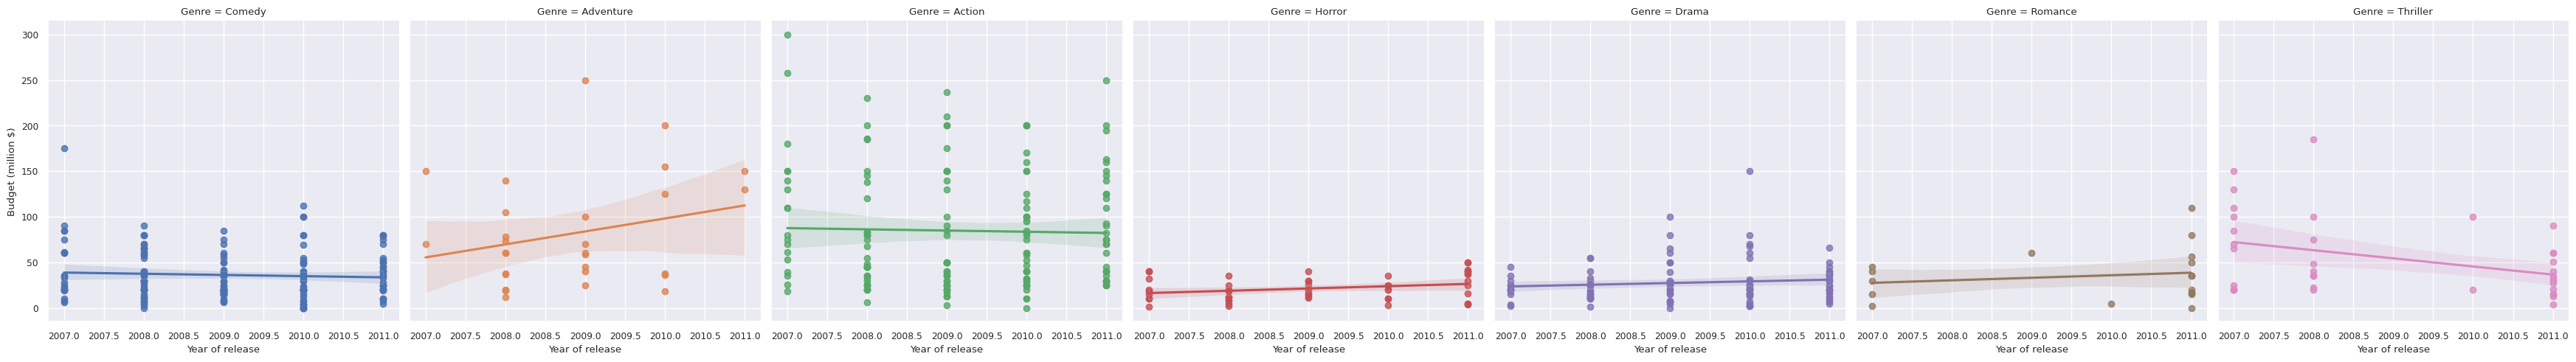

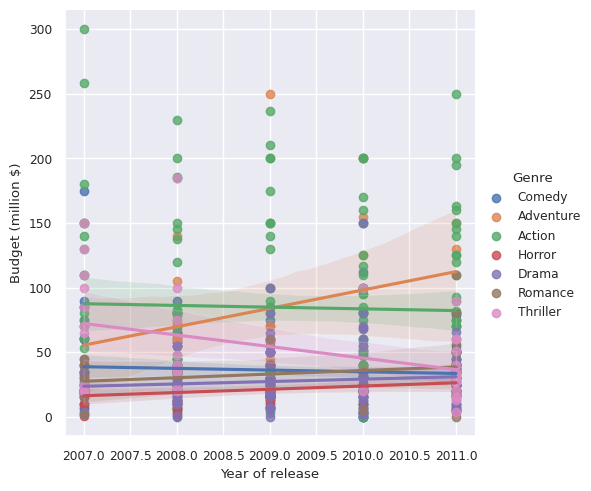

In [ ]:
#What is the average budget of genre by years
#sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")
sns.lmplot(data=movie_ratings, x="Year of release", y="Budget (million $)", col="Genre", hue="Genre")
sns.lmplot(data=movie_ratings, x="Year of release", y="Budget (million $)", #col="Genre",
           hue="Genre")


Insight B:
1. For most of the Genres, there has not been a major change in the budget over the years. There are 2 Genre's wherere there has been a bigger chnage is budget is the Adventure and the Thriller genre.

2. Not alot of datapoints can be found in the Romance Genre. Which might mean that there are not alot of romance movies being analyzed

3. Horror and Drama are probably have the lowest budget year over year

4. the average budget of the adventure genre is more than the action genre from periods after 2009

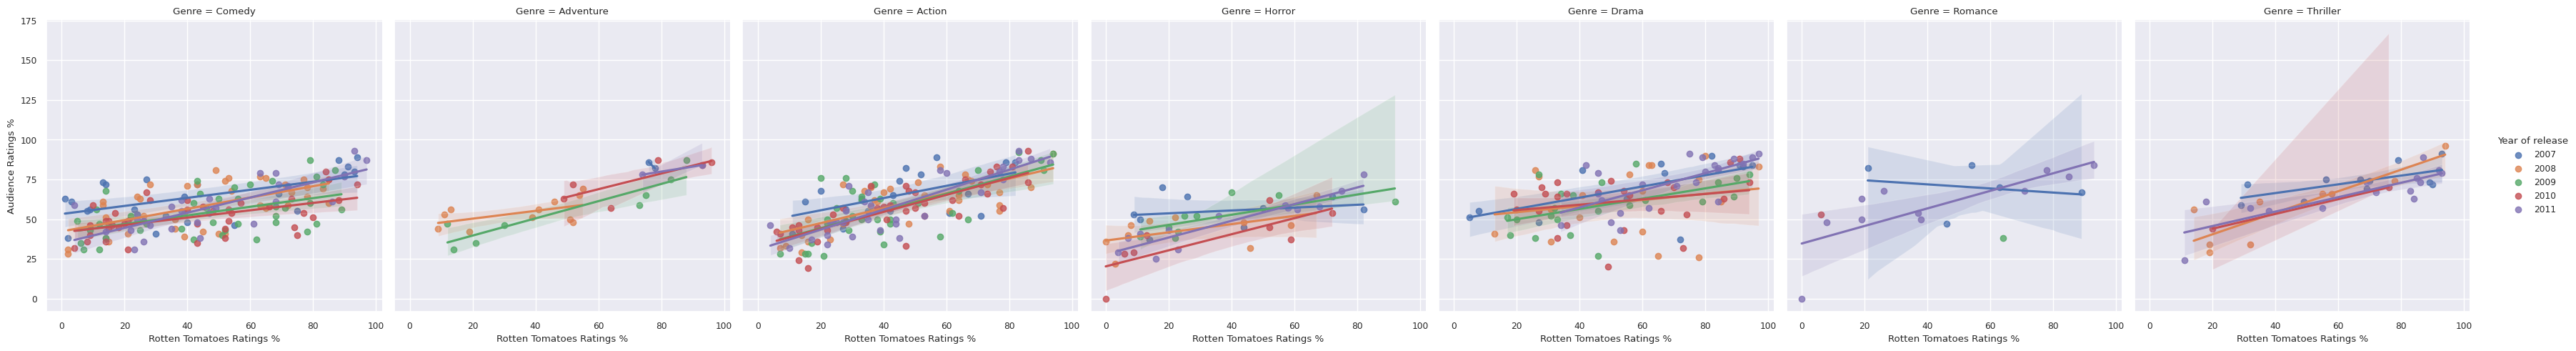

In [ ]:
#Do some genres get better ratings than others?
sns.lmplot(data=movie_ratings, x="Rotten Tomatoes Ratings %", y="Audience Ratings %", col="Genre",
           hue="Year of release")

#### Insight C:
1. There is a positive correlation between the Audience and Rotten Tomatoes Ratings
2. Audience Rating is always higher than Rotten tomatoes rating

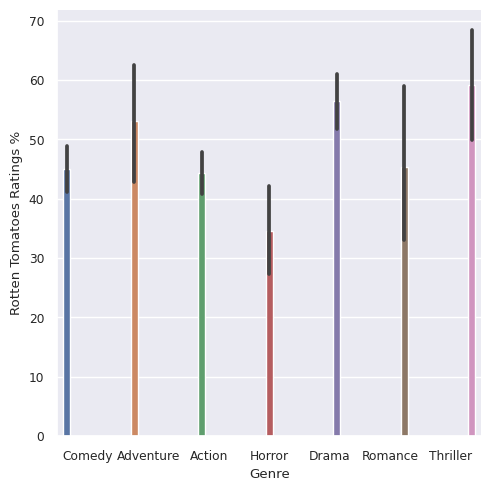

In [ ]:
sns.catplot(data=movie_ratings, kind="bar", x="Genre", y="Rotten Tomatoes Ratings %", hue="Genre")

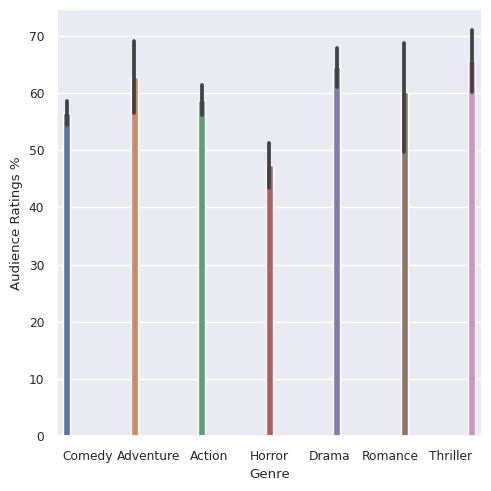

In [ ]:
sns.catplot(data=movie_ratings, kind="bar", x="Genre", y="Audience Ratings %", hue="Genre")